# Business Understanding

Analisis data penjualan merupakan langkah penting dalam memahami tren bisnis dan peluang potensial. Lebih dari itu, melalui data penjualan produk, kita dapat meraih pemahaman mendalam terkait kinerja bisnis secara keseluruhan. Dengan menganalisis data penjualan, akan terbuka peluang untuk mengoptimalkan strategi pemasaran, meningkatkan efisiensi operasional, dan meningkatkan kepuasan pelanggan.

Analisis ini menggunakan dataset SuperStore yang terdiri dari beberapa atribut antara lain:
1.  **Order_ID**: Kode unik untuk setiap order
2.  **Customer_ID**: Kode unik untuk setiap pelanggan
3.  **Postal_Code**: Kode pos pelanggan
4.  **Product_ID**: Kode unik untuk setiap produk
5.  **Sales**: Jumlah total penjualan dalam unit yang ditentukan
6.  **Quantity**: Jumlah produk yang dibeli dalam setiap transaksi
7.  **Discount**: Besar diskon yang diberikan pada transaksi
8.  **Profit**: Keuntungan yang dihasilkan dari transaksi
9.  **Category**: Kategori umum produk yang dijual
10. **Sub-Category**: Subkategori yang lebih spesifik
11. **Product_Name**: Nama produk yang dijual
12. **Order_Date**: Tanggal transaksi dibuat
13. **Ship_Date**: Tanggal pengiriman produk
14. **Ship_Mode**: Metode pengiriman yang digunakan
15. **Customer_Name**: Nama pelanggan
16. **Segment**: Segmentasi pasar pelanggan
17. **Country/Region**: Nama negara/wilayah tempat transaksi dilakukan
18. **City**: Nama kota tempat pelanggan melakukan transaksi
19. **State**: Nama wilayah tempat pelanggan melakukan transaksi
20. **Region**: Wilayah geografis yang lebih luas

Berdasarkan dataset yang digunakan, muncul  permasalahan yang nantinya akan menjadi tujuan analisis dan hasilnya akan menjadi suatu kesimpulan bisnis atau rekomendasi bisnis. Berikut ini permasalahan yang akan dianalisis:
1.  Bagaimana performa penjualan produk secara keseluruhan?
2.  Bagaimana tren penjualan dari waktu ke waktu?
3.  Apakah ada dampak antara diskon terhadap penjualan dan keuntungan?
4.  Bagaimana karakteristik para pelanggan?
5.  Bagaimana sebaran pelanggan?

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from collections import Counter
from datetime import datetime
import geopandas as gpd

# mendefinisikan warna yang digunakan
colors_used = plt.cm.Set1.colors

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Salinan dari SuperStore2 - data.csv to Salinan dari SuperStore2 - data.csv


# Data Understanding

In [2]:
# lokasi dataset disimpan
dataset_path = '/content/Salinan dari SuperStore2 - data.csv'

# load dataset
df = pd.read_csv(dataset_path)

# menampilkan dataset
first_cols = df.iloc[:,:5]
last_cols = df.iloc[:,-5:]

pd.concat([first_cols,pd.DataFrame(['...']*len(df),columns = ['...']),last_cols],axis = 1)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,...,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,...,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,...,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,...,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,...,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,...,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.2480,...,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.9600,...,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.5760,...,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.6000,...,Consumer,United States,Costa Mesa,California,West


In [3]:
# menampilkan informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [4]:
# melihat gambaran singkat atribut bertipe kategorik
print(f'Jumlah pembelian: {df.Order_ID.nunique()}')
print(f'Jumlah pelanggan: {df.Customer_ID.nunique()}')
print(f'Jumlah produk yang terjual: {df.Product_ID.nunique()}')
print(f'Jumlah kategori produk: {df.Category.nunique()}')
print(f'Jumlah subkategori produk: {df["Sub-Category"].nunique()}')
print(f'Jumlah metode pengiriman: {df.Ship_Mode.nunique()}')
print(f'Jumlah segmentasi pelanggan: {df.Segment.nunique()}')
print(f'Jumlah negara asal pelanggan: {df["Country/Region"].nunique()}')
print(f'Jumlah kota asal pelanggan: {df.City.nunique()}')
print(f'Jumlah state asal pelanggan: {df.State.nunique()}')
print(f'Jumlah region asal pelanggan: {df.Region.nunique()}')

Jumlah pembelian: 5009
Jumlah pelanggan: 793
Jumlah produk yang terjual: 1862
Jumlah kategori produk: 3
Jumlah subkategori produk: 17
Jumlah metode pengiriman: 4
Jumlah segmentasi pelanggan: 3
Jumlah negara asal pelanggan: 1
Jumlah kota asal pelanggan: 531
Jumlah state asal pelanggan: 49
Jumlah region asal pelanggan: 4


# Data Preprocessing

In [5]:
# cek missing value
df.isnull().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [6]:
# cek data yang terduplikasi
print('Jumlah data duplikasi:',df.duplicated(subset=['Order_ID','Customer_ID','Product_ID']).sum())

Jumlah data duplikasi: 8


In [7]:
# cek data yang terduplikasi
df[df.duplicated(subset=['Order_ID','Customer_ID','Product_ID'],keep = 'last')]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
350,CA-2019-129714,AB-10060,10009,OFF-PA-10001970,24.560,2,0.0,11.5432,Office Supplies,Paper,Xerox 1881,9/1/2019,9/3/2019,First Class,Adam Bellavance,Home Office,United States,New York City,New York,East
430,US-2019-123750,RB-19795,28052,TEC-AC-10004659,408.744,7,0.2,76.6395,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,4/15/2019,4/21/2019,Standard Class,Ross Baird,Home Office,United States,Gastonia,North Carolina,South
1300,CA-2019-137043,LC-17140,22153,FUR-FU-10003664,572.760,6,0.0,166.1004,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",12/23/2019,12/25/2019,Second Class,Logan Currie,Consumer,United States,Springfield,Virginia,South
3183,CA-2020-152912,BM-11650,21044,OFF-ST-10003208,1633.140,9,0.0,473.6106,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,11/9/2020,11/12/2020,Second Class,Brian Moss,Corporate,United States,Columbia,Maryland,East
3405,US-2017-150119,LB-16795,43229,FUR-CH-10002965,281.372,2,0.3,-12.0588,Furniture,Chairs,Global Leather Highback Executive Chair with P...,4/23/2017,4/27/2017,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,East
6498,CA-2018-103135,SS-20515,40214,OFF-BI-10000069,135.090,9,0.0,62.1414,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",7/24/2018,7/28/2018,Standard Class,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,South
7881,CA-2020-118017,LC-16870,80229,TEC-AC-10002006,76.752,6,0.2,10.5534,Technology,Accessories,Memorex Micro Travel Drive 16 GB,12/3/2020,12/6/2020,Second Class,Lena Cacioppo,Consumer,United States,Thornton,Colorado,West
9168,CA-2019-140571,SJ-20125,39212,OFF-PA-10001954,319.760,14,0.0,147.0896,Office Supplies,Paper,Xerox 1964,3/15/2019,3/19/2019,Standard Class,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,South


In [8]:
# cek data yang terduplikasi
# cek salah satu data duplikasi
df[(df['Order_ID']=='CA-2019-129714') & (df['Product_ID']=='OFF-PA-10001970')]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
350,CA-2019-129714,AB-10060,10009,OFF-PA-10001970,24.56,2,0.0,11.5432,Office Supplies,Paper,Xerox 1881,9/1/2019,9/3/2019,First Class,Adam Bellavance,Home Office,United States,New York City,New York,East
352,CA-2019-129714,AB-10060,10009,OFF-PA-10001970,49.12,4,0.0,23.0864,Office Supplies,Paper,Xerox 1881,9/1/2019,9/3/2019,First Class,Adam Bellavance,Home Office,United States,New York City,New York,East


Baris 350 dan 352 memiliki Order_ID dan Product_ID yang sama. Namun jika diperhatikan jumlah barang yang dibeli memiliki perbedaan. Sehingga perlu dilakukan drop nilai duplikat dengan tetap menyimpan nilai terakhir.

In [9]:
df = df.drop_duplicates(subset = ['Order_ID','Customer_ID','Product_ID'], keep = 'last', ignore_index = True)

In [10]:
# cek data yang terduplikasi
# cek salah satu data duplikasi
df[(df['Order_ID']=='CA-2019-129714') & (df['Product_ID']=='OFF-PA-10001970')]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
351,CA-2019-129714,AB-10060,10009,OFF-PA-10001970,49.12,4,0.0,23.0864,Office Supplies,Paper,Xerox 1881,9/1/2019,9/3/2019,First Class,Adam Bellavance,Home Office,United States,New York City,New York,East


In [11]:
# merubah format Order_Date dan Ship_Date menjadi tanggal
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [12]:
print(f'format atribut Order_Date: {df["Order_Date"].dtype}')
print(f'format atribut Ship_Date: {df["Ship_Date"].dtype}')

format atribut Order_Date: datetime64[ns]
format atribut Ship_Date: datetime64[ns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9986 non-null   object        
 1   Customer_ID     9986 non-null   object        
 2   Postal_Code     9986 non-null   int64         
 3   Product_ID      9986 non-null   object        
 4   Sales           9986 non-null   float64       
 5   Quantity        9986 non-null   int64         
 6   Discount        9986 non-null   float64       
 7   Profit          9986 non-null   float64       
 8   Category        9986 non-null   object        
 9   Sub-Category    9986 non-null   object        
 10  Product_Name    9986 non-null   object        
 11  Order_Date      9986 non-null   datetime64[ns]
 12  Ship_Date       9986 non-null   datetime64[ns]
 13  Ship_Mode       9986 non-null   object        
 14  Customer_Name   9986 non-null   object        
 15  Segm

# Exploratory Data Analysis

## Bagaimana performa penjualan produk secara keseluruhan?

In [14]:
# membuat dataset baru dengan atribut
# Category, Sales, dan Profit
agg_by_cat = df[['Sales','Profit','Category']]

# membuat tabel persentase penjualan berdasarkan kategori produk
agg_sales_by_cat = agg_by_cat[['Sales','Category']]
agg_sales_by_cat = agg_sales_by_cat.groupby(by=['Category'],as_index=False).agg(Sales=('Sales','sum'))
agg_sales_by_cat['Sales'] = round(agg_sales_by_cat['Sales']/agg_sales_by_cat['Sales'].sum()*100,2)
agg_sales_by_cat = agg_sales_by_cat.sort_values('Sales',ascending=False, ignore_index= True)

# membuat tabel persentase keuntungan berdasarkan kategori produk
agg_profit_by_cat = agg_by_cat[['Profit','Category']]
agg_profit_by_cat = agg_profit_by_cat.groupby(by=['Category'],as_index=False).agg(Profit=('Profit','sum'))
agg_profit_by_cat['Profit'] = round(agg_profit_by_cat['Profit']/agg_profit_by_cat['Profit'].sum()*100,2)
agg_profit_by_cat = agg_profit_by_cat.sort_values('Profit',ascending=False,ignore_index=True)

# menggabungkan tabel persentase sales dan profit berdasarkan kategori produk
agg_cat = pd.merge(agg_sales_by_cat, agg_profit_by_cat, on = 'Category')

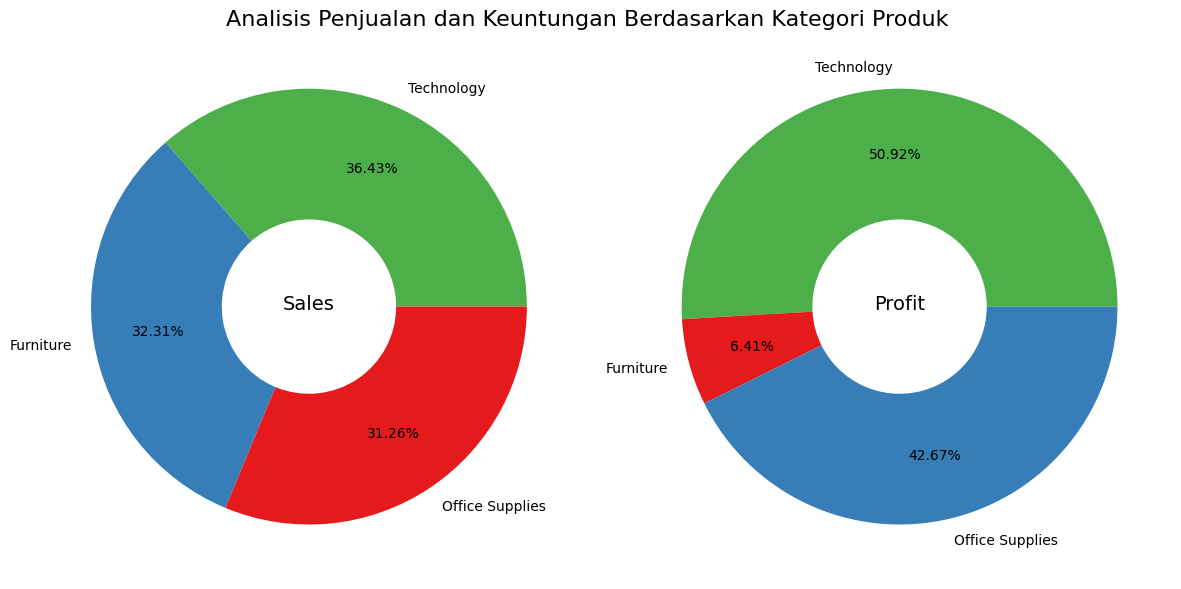

In [15]:
labels = agg_cat['Category']
sales_values = agg_cat['Sales']
profit_values = agg_cat['Profit']

# visualisasi penjualan dan keuntungan berdasarkan kategori produk
fig, axes = plt.subplots(1,2,figsize=(12,8))

# Persentase penjualan berdasarkan kategori produk
colors = [colors_used[0] if i == np.argmin(sales_values) else colors_used[2] if i == np.argmax(sales_values) else colors_used[1] for i in range(len(sales_values))]
axes[0].pie(sales_values,labels = labels,colors = colors,autopct='%1.2f%%', wedgeprops = dict(width = 0.6),pctdistance = 0.7)
axes[0].set_title('Sales',fontsize = 14, y = 0.48)

# Persentase keuntungan berdasarkan kategori produk
colors = [colors_used[0] if i == np.argmin(profit_values) else colors_used[2] if i == np.argmax(profit_values) else colors_used[1] for i in range(len(profit_values))]
axes[1].pie(profit_values,labels = labels ,colors= colors,autopct='%1.2f%%', wedgeprops = dict(width = 0.6), pctdistance = 0.7)
axes[1].set_title('Profit',fontsize = 14, y = 0.48)

plt.suptitle('Analisis Penjualan dan Keuntungan Berdasarkan Kategori Produk',fontsize = 16, y = 0.85)

plt.tight_layout()
plt.show()

Persentase penjualan antar kategori produk cukup seimbang, artinya ketiga kategori tersebut secara seimbang digemari oleh para pelanggan. Meskipun ketiga kategori produk digemari oleh pelanggan, namun keuntungan dari produk dengan kategori **Furniture** sangat rendah. Hal ini mungkin disebabkan dari biaya produksi atau operasional yang tinggi, dan pemberian diskon yang terlalu sering.

In [16]:
# membuat tabel penjualan tiap sub-category
agg_sales_by_subcat = df[['Sales','Sub-Category']]
agg_sales_by_subcat = agg_sales_by_subcat.groupby(by='Sub-Category',as_index = False).agg(Sales=('Sales','sum'))
agg_sales_by_subcat = agg_sales_by_subcat.sort_values('Sales',ascending = True, ignore_index = True)

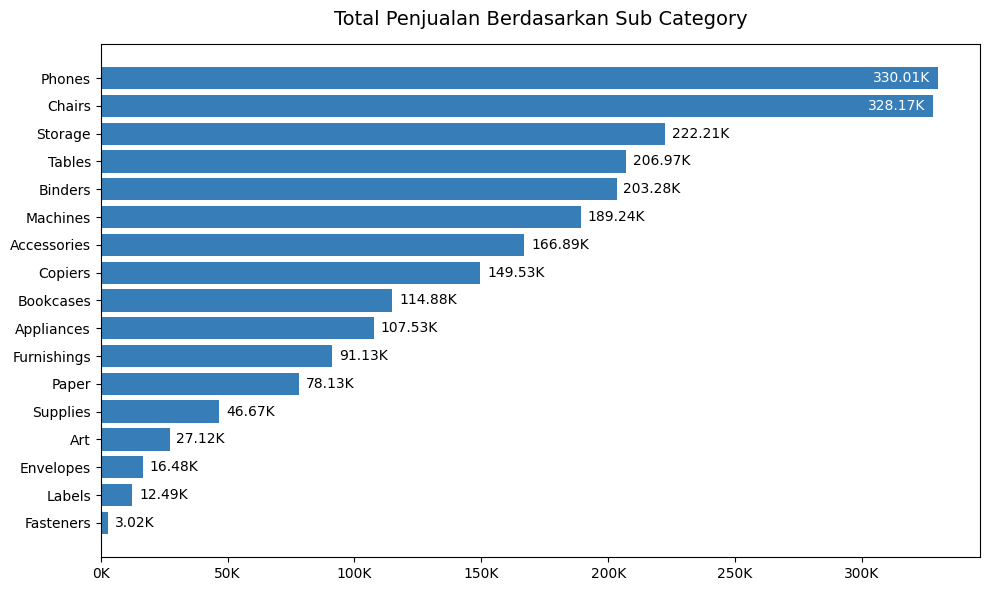

In [17]:
# membuat visualisasi penjualan tiap sub-category
# Fungsi untuk mengonversi nilai sumbu x ke format "K"
def format_thousands(value, _):
    return f'{value/1000:.0f}K'

# membuat fungsi label
def to_ordinal(num):
    if isinstance(num, (int,float)) and num >= 1000:
        return f'{num/1000:.2f}K'
    else:
        return str(num)

# Membuat formatter untuk sumbu x
x_formatter = FuncFormatter(format_thousands)

fig, ax = plt.subplots(figsize = (10,6))

bars = ax.barh(agg_sales_by_subcat['Sub-Category'],agg_sales_by_subcat['Sales'], color = colors_used[1])

ax.set_title('Total Penjualan Berdasarkan Sub Category',fontsize = 14,y = 1.02)

# Menetapkan formatter untuk sumbu x
ax.xaxis.set_major_formatter(x_formatter)

# mengatur label
small_values = [to_ordinal(i) if i < 300000 else '' for i in agg_sales_by_subcat['Sales']]
large_values = [to_ordinal(i) if i >= 300000 else '' for i in agg_sales_by_subcat['Sales']]

ax.bar_label(bars, labels = small_values,fontsize = 10, padding = 5)
ax.bar_label(bars, labels = large_values, color = 'white', fontsize = 10, padding = -47)

plt.tight_layout()
plt.show()

Top 5 penjualan terbanyak adalah jenis produk phones sebesar 330.01 ribu, chairs 328.17 ribu, Storage sebesar 222.21 ribu, Tables sebesar 206.97 ribu, dan Binders sebesar 203.28 ribu. Hal ini menunjukan jika kelima produk tersebut sangat digemari dan paling sering di order oleh pelanggan.

In [18]:
# membuat tabel keuntungan tiap sub-category
agg_profit_by_subcat = df[['Profit','Sub-Category']]
agg_profit_by_subcat = agg_profit_by_subcat.groupby(by='Sub-Category',as_index = False).agg(Profit=('Profit','sum'))
agg_profit_by_subcat = agg_profit_by_subcat.sort_values('Profit',ascending = True, ignore_index = True)
agg_profit_by_subcat['Profit'] = round(agg_profit_by_subcat['Profit'],2)

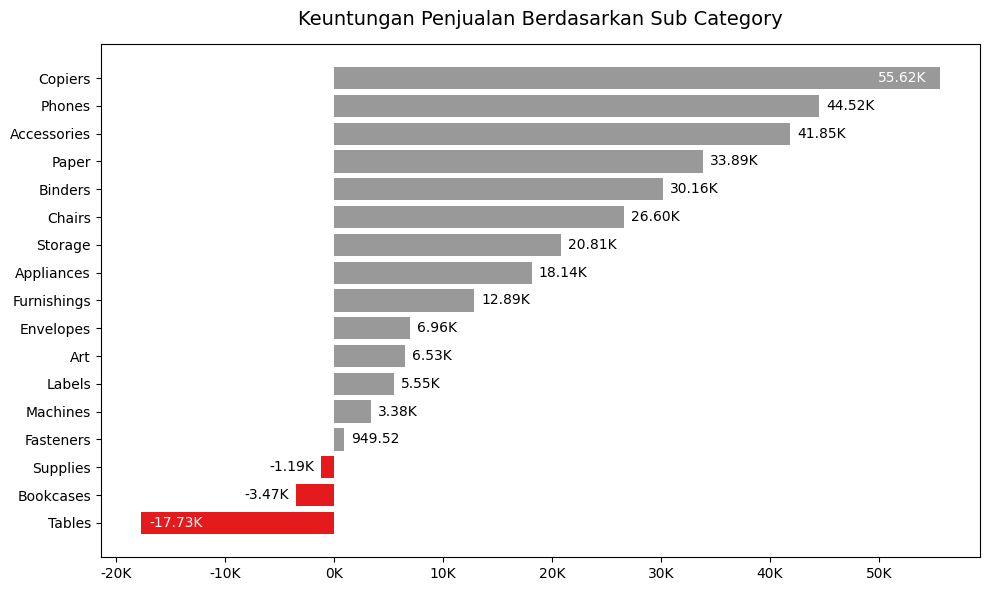

In [19]:
# membuat visualisasi keuntungan tiap sub-category
# Fungsi untuk mengonversi nilai sumbu x ke format "K"
def format_thousands(value, _):
    return f'{value/1000:.0f}K'

# membuat fungsi label
def to_ordinal(num):
    if num < 0:
        if isinstance(num, (int,float)) and (num*-1) >= 1000:
            return f'{num/1000:.2f}K'
        else:
            return str(num)
    elif num > 0:
        if isinstance(num, (int,float)) and num >= 1000:
            return f'{num/1000:.2f}K'
        else:
            return str(num)

# Membuat formatter untuk sumbu x
x_formatter = FuncFormatter(format_thousands)

colors = [colors_used[0] if i in agg_profit_by_subcat[agg_profit_by_subcat['Profit']<=0].index else colors_used[-1] for i in range(len(agg_profit_by_subcat))]

fig, ax = plt.subplots(figsize = (10,6))

bars = ax.barh(agg_profit_by_subcat['Sub-Category'],agg_profit_by_subcat['Profit'], color = colors)

ax.set_title('Keuntungan Penjualan Berdasarkan Sub Category',fontsize = 14,y = 1.02)

# Menetapkan formatter untuk sumbu x
ax.xaxis.set_major_formatter(x_formatter)

# mengatur label
small_values = [to_ordinal(i) if i < 50000 and i >-15000 else '' for i in agg_profit_by_subcat['Profit']]
large_values = [to_ordinal(i) if i >= 50000 or i < -15000 else '' for i in agg_profit_by_subcat['Profit']]

ax.bar_label(bars, labels = small_values, fontsize = 10, padding = 5)
ax.bar_label(bars, labels = large_values, color = 'white', fontsize = 10, padding = -45)

plt.tight_layout()
plt.show()

Terdapat 3 sub kategori produk yang dapat menyebabkan kerugian yaitu Suplies, Boockcases, dan Tables. Namun kerugian terbesar adalah Tables sebesar 17.73 ribu. Menariknya, Tables menjadi top 5 penjualan terbesar justru mengakibatkan kerugian tertinggi. Perlu dilakukan evaluasi lebih lanjut terkait produk-produk dengan keuntungan negatif untuk memahami penyebabnya. Strategi pemasaran atau penentuan harga dapat disesuaikan untuk meningkatkan keuntungan pada produk-produk tertentu. Namun, produk yang memberikan keuntungan tinggi dapat menjadi fokus penjualan.

In [20]:
df_order_ship = df[['Ship_Date','Order_Date']]
df_order_ship['selisih'] = (df['Ship_Date'] - df['Order_Date']).dt.days

mean_ship = round(df_order_ship['selisih'].describe()['mean'],0)
min_ship = round(df_order_ship['selisih'].describe()['min'],0)
max_ship = round(df_order_ship['selisih'].describe()['max'],1)

print(f'Rata-rata pengiriman barang adalah {int(mean_ship)} hari')
print(f'Pengiriman barang tercepat adalah {int(min_ship)} hari')
print(f'Pengiriman barang terlama adalah {int(max_ship)} hari')
print('')
print('Pengiriman terlama mencapai lebih dari seminggu. Hal ini kemungkinan dapat disebabkan karena wilayah pelanggan yang terlampau')
print('jauh dengan perusahaan penyedia barang atau adanya kendala saat pengiriman.')

Rata-rata pengiriman barang adalah 4 hari
Pengiriman barang tercepat adalah 0 hari
Pengiriman barang terlama adalah 8 hari

Pengiriman terlama mencapai lebih dari seminggu. Hal ini kemungkinan dapat disebabkan karena wilayah pelanggan yang terlampau
jauh dengan perusahaan penyedia barang atau adanya kendala saat pengiriman.


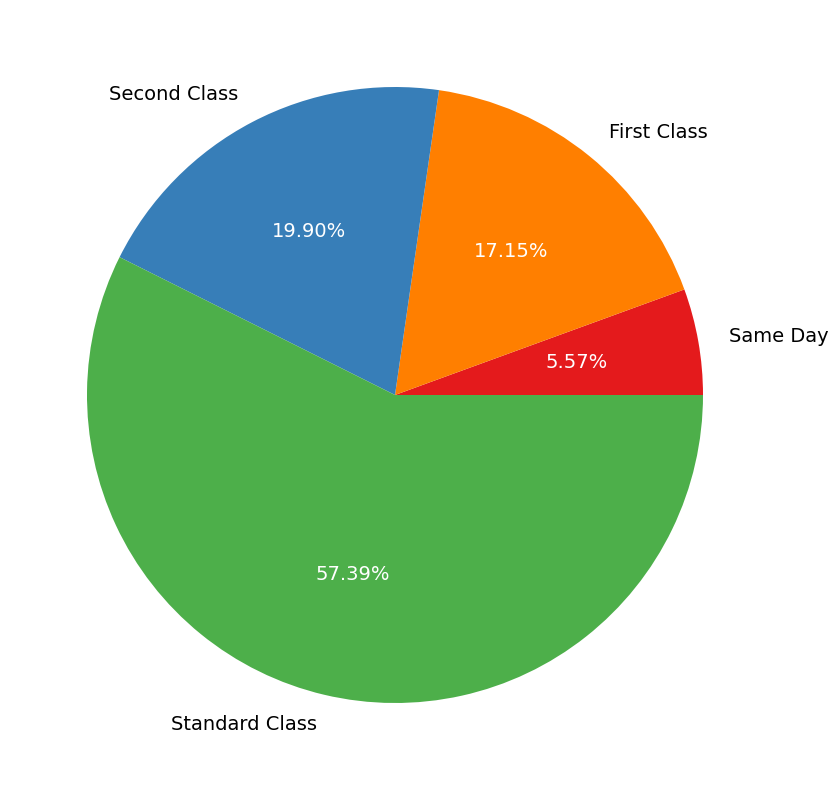

In [21]:
df_ship_mode = df[['Ship_Mode','Profit']]
df_ship_mode = df_ship_mode.groupby('Ship_Mode',as_index = False).agg(Profit = ('Profit','sum'))
df_ship_mode = df_ship_mode.sort_values('Profit',ascending=True,ignore_index = True)

# visualisasi
colors = [colors_used[0],colors_used[4],colors_used[1],colors_used[2]]

plt.figure(figsize = (10,8))

_,_, autotexts = plt.pie(df_ship_mode.Profit, labels = df_ship_mode.Ship_Mode, autopct = '%1.2f%%',colors = colors,textprops={'size':14})

for autotext in autotexts:
    autotext.set_color('white')

plt.tight_layout()
plt.show()

Metode pengiriman standard class mencapai keuntungan tertinggi jika dibandingkan dengan metode lainnya. Hal ini menunjukan bahwa sebagian besar pelanggan memilih opsi tersebut, sehingga perusahaan dapat mempertimbangkan strategi untuk meningkatkan keuntungan dari metode tersebut. Perusahaan juga dapat mengidentifikasi kecenderungan pelanggan dalam memilih metode pengiriman tertentu.

## Bagaimana tren penjualan dari waktu ke waktu?

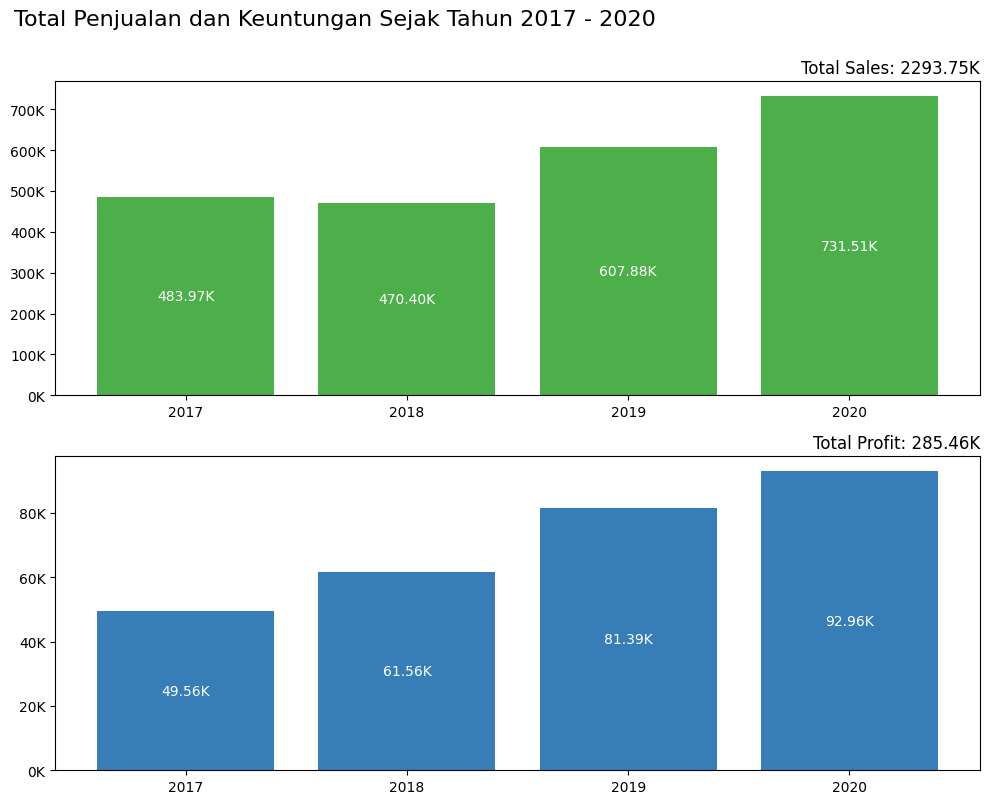

In [22]:
# Total penjualan dan keuntungan
df_total = df[['Sales','Profit','Order_Date']]
df_total['Order_Year'] = df_total['Order_Date'].dt.year.astype('str')
df_total = df_total.drop(['Order_Date'],axis=1)
df_total = df_total.groupby(['Order_Year'],as_index = False).sum()

# Fungsi untuk mengonversi nilai sumbu y ke format "K"
def format_thousands(value, _):
    return f'{value/1000:.0f}K'

# Membuat formatter untuk sumbu y
y_formatter = FuncFormatter(format_thousands)

# visualisasi
fig, axes = plt.subplots(2,1,figsize=(10,8))

fig.suptitle('Total Penjualan dan Keuntungan Sejak Tahun 2017 - 2020',x = 0.34, y=1, fontsize = 16)

sales_bars = axes[0].bar(df_total.Order_Year,df_total.Sales, color = colors_used[2])
axes[0].set_title(f'Total Sales: {df_total.Sales.sum()/1000:.2f}K', fontsize = 12, loc = 'right')
axes[0].bar_label(sales_bars, labels = [f'{x/1000:.2f}K' for x in df_total.Sales],fontsize = 10, label_type = 'center', color = 'white')

profit_bars = axes[1].bar(df_total.Order_Year,df_total.Profit, color = colors_used[1])
axes[1].set_title(f'Total Profit: {df_total.Profit.sum()/1000:.2f}K',fontsize=12, loc = 'right')
axes[1].bar_label(profit_bars, labels = [f'{x/1000:.2f}K' for x in df_total.Profit], fontsize = 10, label_type = 'center', color = 'white')

for ax in axes:
    ax.yaxis.set_major_formatter(y_formatter)

plt.tight_layout()
plt.show()

Total penjualan selama tahun 2017-2020 sebesar 2297.2 ribu. Jika diperhatikan, penjualan tiap tahun cenderung meningkat meskipun pada tahun 2018 mengalami penurunan yang tidak signifikan dibandingkan tahun 2017. Sementara total keuntungan selama tahun 2017 - 2020 sebesar 286.4 ribu. Menariknya, keuntungan tiap tahun selalu meningkat.

Hal ini menunjukan bahwa performa keuangan yang positif bagi perusahaan. Konsistensi peningkatan keuntungan ini dapat dianggap sebagai indikator keberhasilan dalam strategi bisnis dan manajemen keuangan yang diterapkan. Kesimpulannya, meskipun terdapat penurunan penjualan pada tahun tertentu, namun pertumbuhan keuntungan yang konsisten meningkat dapat menciptakan landasan kuat untuk kelangsungan bisnis dan potensi pertumbuhan di masa depan.

In [23]:
# sales
agg_sales_by_order_date = df[['Sales','Order_Date']].groupby(by=['Order_Date'],as_index=False).agg(Sales=('Sales','sum'))
agg_sales_by_order_date = agg_sales_by_order_date.sort_values(by='Order_Date')

## merubah data harian menjadi data bulanan
agg_sales_by_order_date.set_index('Order_Date',inplace=True)
agg_sales_by_order_month = agg_sales_by_order_date.resample('M').sum()

## filter dataset menurut tahun
agg_sales_2017 = agg_sales_by_order_month[agg_sales_by_order_month.index.year == 2017]
agg_sales_2018 = agg_sales_by_order_month[agg_sales_by_order_month.index.year == 2018]
agg_sales_2019 = agg_sales_by_order_month[agg_sales_by_order_month.index.year == 2019]
agg_sales_2020 = agg_sales_by_order_month[agg_sales_by_order_month.index.year == 2020]

# profit
agg_profit_by_order_date = df[['Profit','Order_Date']].groupby(by=['Order_Date'],as_index=False).agg(Profit=('Profit','sum'))
agg_profit_by_order_date = agg_profit_by_order_date.sort_values(by = 'Order_Date')

## merubah data harian menjadi data bulanan
agg_profit_by_order_date.set_index('Order_Date',inplace=True)
agg_profit_by_order_month = agg_profit_by_order_date.resample('M').sum()

## filter dataset menurut tahun
agg_profit_2017 = agg_profit_by_order_month[agg_profit_by_order_month.index.year == 2017]
agg_profit_2018 = agg_profit_by_order_month[agg_profit_by_order_month.index.year == 2018]
agg_profit_2019 = agg_profit_by_order_month[agg_profit_by_order_month.index.year == 2019]
agg_profit_2020 = agg_profit_by_order_month[agg_profit_by_order_month.index.year == 2020]

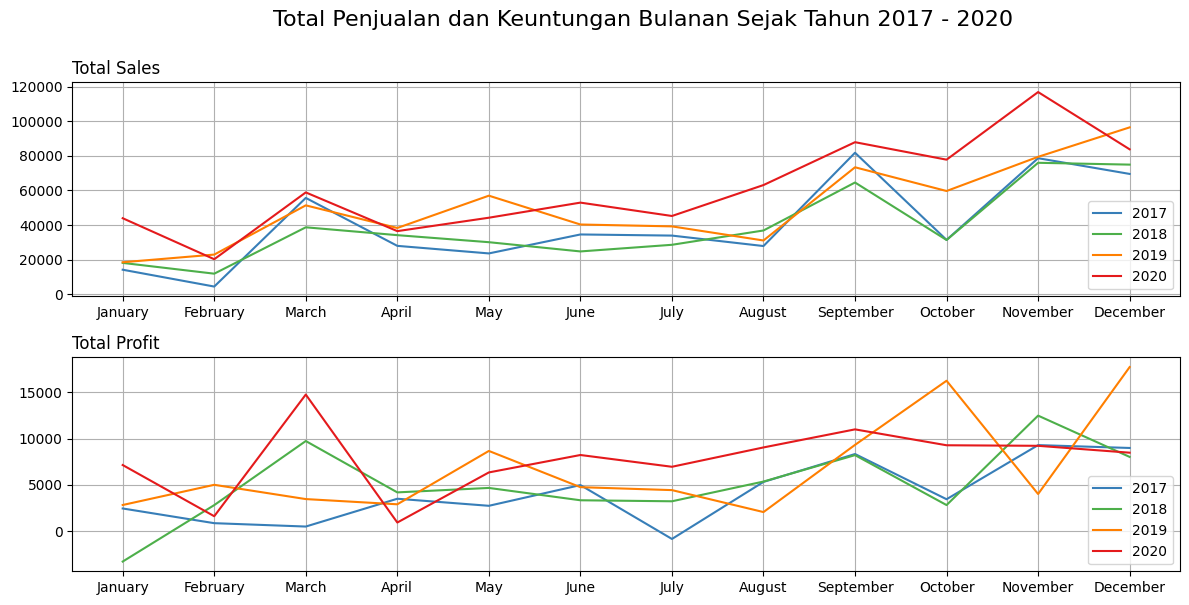

In [24]:
# visualisasi
fig, axes = plt.subplots(2,1,figsize = (12,6))

fig.suptitle('Total Penjualan dan Keuntungan Bulanan Sejak Tahun 2017 - 2020',x = 0.54, y=1, fontsize = 16)

# plot per tahun
axes[0].plot(agg_sales_2017.index.strftime('%B').values,agg_sales_2017['Sales'].values,label = '2017', color = colors_used[1])
axes[0].plot(agg_sales_2018.index.strftime('%B').values,agg_sales_2018['Sales'].values,label = '2018', color = colors_used[2])
axes[0].plot(agg_sales_2019.index.strftime('%B').values,agg_sales_2019['Sales'].values,label = '2019', color = colors_used[4])
axes[0].plot(agg_sales_2020.index.strftime('%B').values,agg_sales_2020['Sales'].values,label = '2020', color = colors_used[0])

axes[1].plot(agg_profit_2017.index.strftime('%B').values,agg_profit_2017['Profit'].values,label = '2017', color = colors_used[1])
axes[1].plot(agg_profit_2018.index.strftime('%B').values,agg_profit_2018['Profit'].values,label = '2018', color = colors_used[2])
axes[1].plot(agg_profit_2019.index.strftime('%B').values,agg_profit_2019['Profit'].values,label = '2019', color = colors_used[4])
axes[1].plot(agg_profit_2020.index.strftime('%B').values,agg_profit_2020['Profit'].values,label = '2020', color = colors_used[0])


axes[0].set_title('Total Sales', loc = 'left')
axes[1].set_title('Total Profit', loc = 'left')
axes[0].grid()
axes[1].grid()

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Trend penjualan cenderung mengalami kenaikan pada saat kuartal keempat untuk setiap tahunnya. Namun, terdapat pola menarik pada penjualan setiap tahun. Hasil analisis menunjukan bahwa penjualan awal tahun cenderung menurun jika dibandingkan dengan akhir tahun. Sementara, keuntungan tiap tahun mengalami fluktuatif dan cenderung stabil.

## Bagaimana pengaruh besaran diskon terhadap penjualan dan keuntungan?

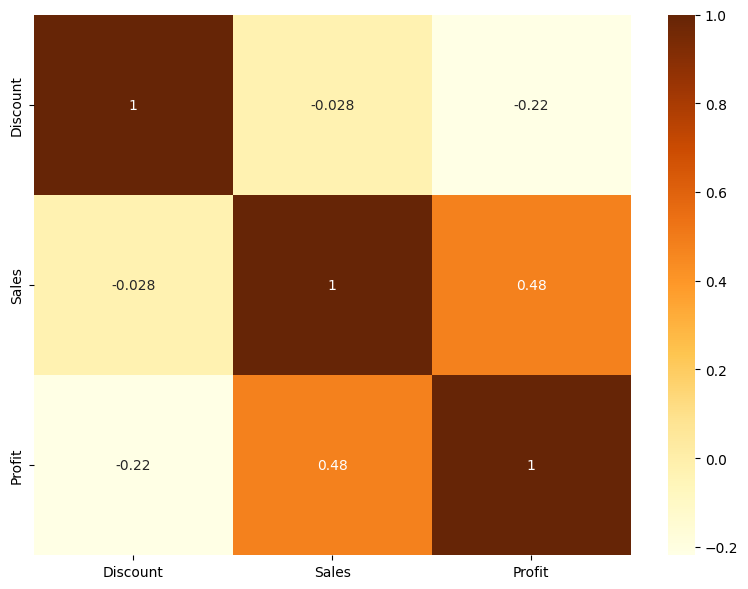

In [25]:
num_corr = df[['Discount','Sales','Profit']].corr(method = 'pearson').round(4)

# visualisasi
plt.figure(figsize = (8,6))

sns.heatmap(num_corr, annot = True, cmap='YlOrBr')

plt.tight_layout()
plt.show()

- **Discount vs Sales**:
korelasi mendekati nol menunjukan tidak ada hubungan linear yang kuat antara kedua variabel tersebut.

- **Discount vs Profit**:
Terdapat hubungan negatif yang cukup rendah antara kedua variabel tersebut. Hal ini menunjukan apabila terjadi peningkatan diskon maka keuntungan cenderung mengalami penurunan.

- **Sales vs Profit**:
Terdapat hubungan positif yang cukup rendah antara kedua variabel tersebut. Hal ini menunjukan apabila penjualan meningkat maka keuntungan cenderung mengalami peningkatan.

Informasi ini dapat menjadi gambaran awal tentang hubungan antar variabel di atas, namun perlu diingat bahwa korelasi antar variabel tidak menggambarkan sebab-akibat. Sehingga perlu dilakukan analisis lebih lanjut untuk memahami dapmak sebenarnya dari hubungan antar variabel-variabel di atas.

## Bagaimana karakteristik para pelanggan?

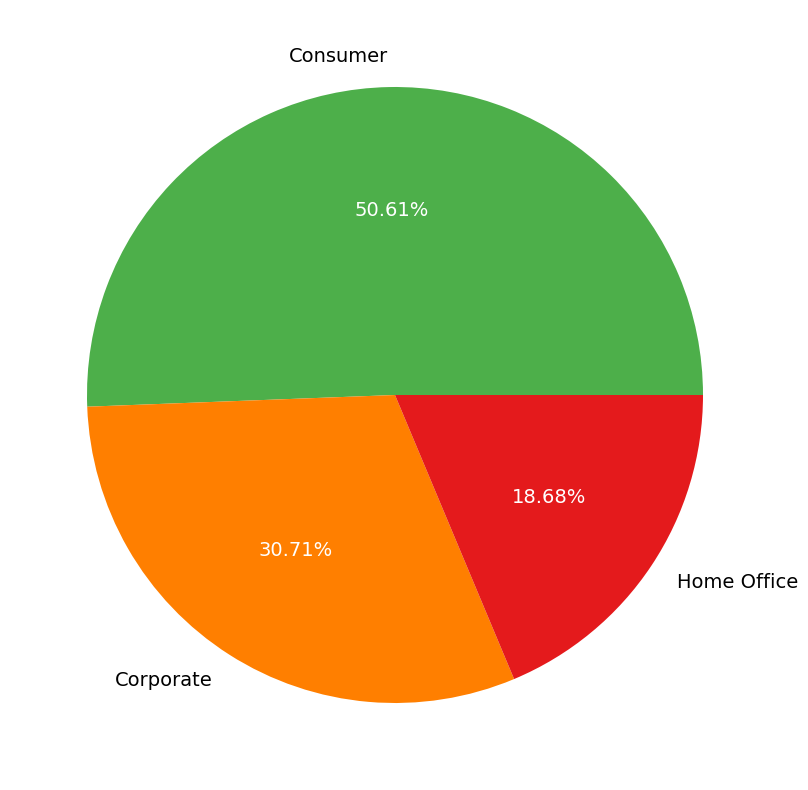

In [26]:
df_segment_cust = df[['Segment','Sales']]
df_segment_cust = df_segment_cust.groupby(by=['Segment']).agg(Sales=('Sales','sum'))
df_segment_cust['Sales'] = df_segment_cust['Sales']/df_segment_cust['Sales'].sum()
df_segment_cust

# visualisasi
colors = [colors_used[2],colors_used[4],colors_used[0]]

plt.figure(figsize = (10,8))

_,_, autotexts = plt.pie(df_segment_cust.Sales, labels = df_segment_cust.index, autopct = '%1.2f%%',colors = colors, textprops={'size':14})

for autotext in autotexts:
    autotext.set_color('white')

plt.tight_layout()
plt.show()

Kelompok pelanggan paling besar adalah consumer, sementara yang paling sedikit adalah kelompok Home Office. Dengan ini perusahaan dapat mengidentifikasi peluang penjualan, dimana perlu meningkatkan strategi pemasaran atau layanan bagi kelompok Home Office. Sementara kelompok lainnya dapat melakukan pengoptimalan strategi pemasaran dan layanan agar penjualan pada kelompok ini tidak menurun.

## Bagaimana sebaran pelanggan?

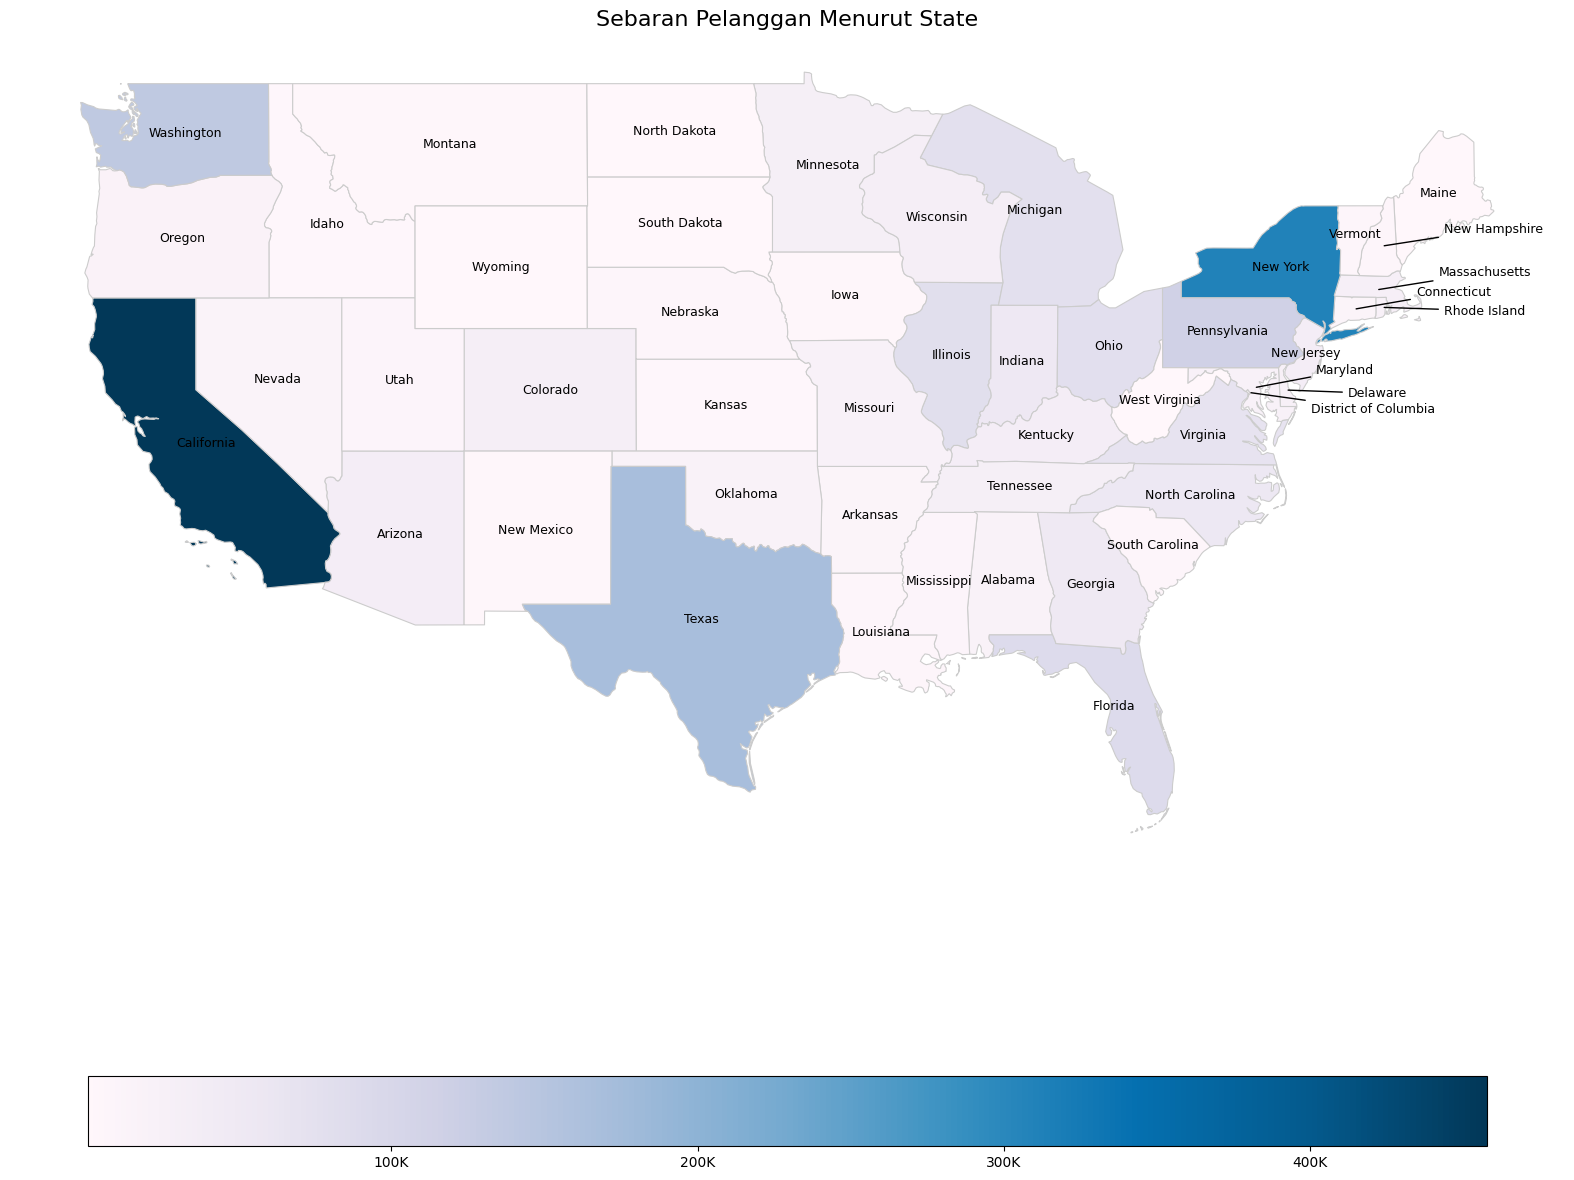

In [27]:
usa_state = gpd.read_file('/content/ne_50m_admin_1_states_provinces.shp')

df_sales_by_state = df[['Sales','State']]
df_sales_by_state = df_sales_by_state.groupby('State',as_index = False).agg(Sales = ('Sales','sum'))
df_sales_by_state = df_sales_by_state.sort_values('Sales',ascending = True, ignore_index = True)

merged_data_sales_state = usa_state.merge(df_sales_by_state, how = 'left', left_on = 'gn_name', right_on = 'State')
merged_data_sales_state = merged_data_sales_state.dropna(axis = 0,subset='Sales')

# vsiualisasi
# Fungsi untuk mengonversi nilai sumbu ke format "K"
def format_thousands(value, _):
    return f'{value/1000:.0f}K'

# Membuat formatter untuk sumbu warna
colorbar_formatter = FuncFormatter(format_thousands)

# Fungsi untuk menambahkan label di luar wilayah kecil
def add_external_label(ax, label, xy, xytext, color='black'):
    ax.annotate(label, xy=xy, xytext=xytext, textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=color), color=color, fontsize = 9)

fig, ax = plt.subplots(1,1, figsize = (16,14))
merged_data_sales_state.plot(
    column = 'Sales',
    cmap = 'PuBu',
    linewidth = 0.8,
    ax = ax,
    edgecolor = '0.8',
    legend=True,
    legend_kwds = {'orientation':'horizontal','format':colorbar_formatter, 'shrink':0.9}
)

# merapikan label
for x,y, label in zip(merged_data_sales_state.geometry.centroid.x, merged_data_sales_state.geometry.centroid.y,merged_data_sales_state['State']):
    if label in ['New Hampshire','Connecticut','Maryland','Massachusetts']:
        add_external_label(ax, label, (x, y), (45, 10), color='black')
    elif label in ['Rhode Island','Delaware']:
        add_external_label(ax, label, (x, y), (45, -5), color='black')
    elif label in ['District of Columbia']:
        add_external_label(ax, label, (x, y), (45, -15), color='black')
    else:
        ax.text(x, y, label, fontsize = 9, ha = 'center',va = 'center')

plt.title('Sebaran Pelanggan Menurut State', fontsize = 16)

ax.set_axis_off()

plt.tight_layout()
plt.show()

Terdapat lima state dengan penjualan terbanyak yaitu California, New York, Texas, Washington, dan Pennsylvania. Artinya, Kelima state tersebut memiliki peminat yang signifikan. Perusahaan dapat memperkuat strategi pemasaran dan mengoptimalkan layanan pada kelima state tersebut agar penjualan tidak menurun.

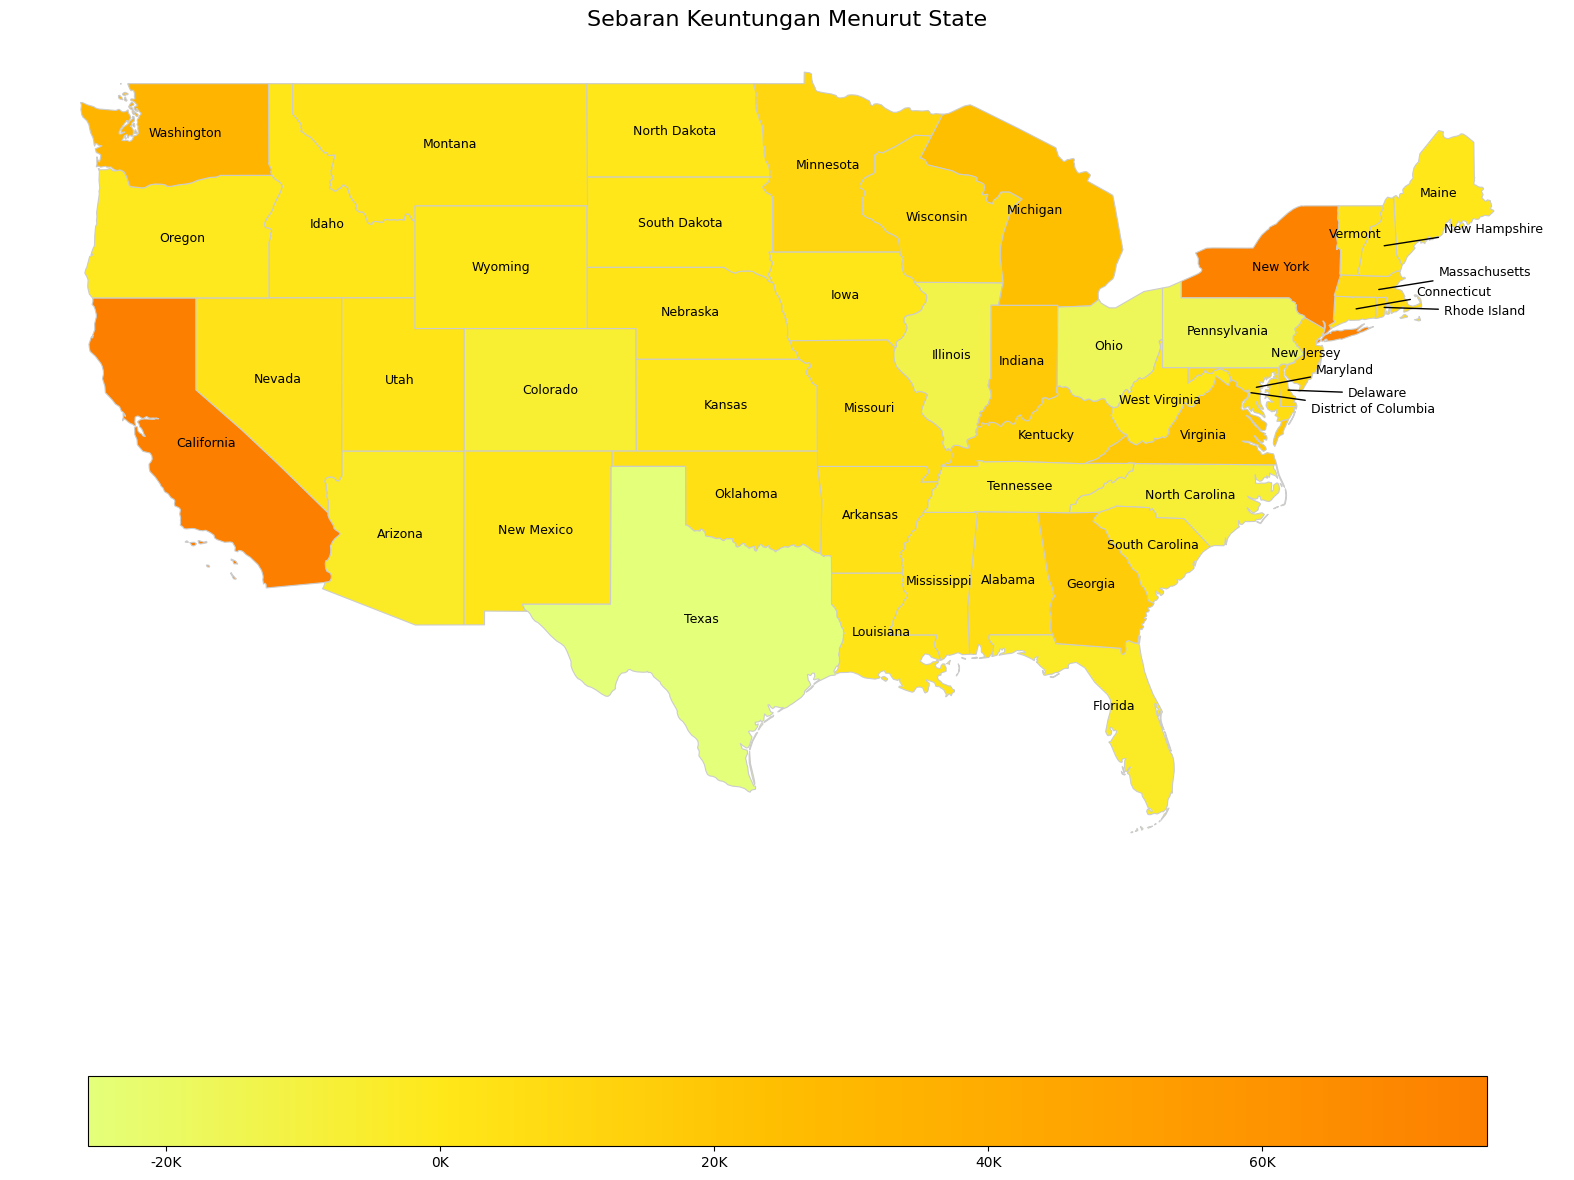

In [28]:
usa_state = gpd.read_file('/content/ne_50m_admin_1_states_provinces.shp')

df_profit_by_state = df[['Profit','State']]
df_profit_by_state = df_profit_by_state.groupby('State',as_index = False).agg(Profit = ('Profit','sum'))
df_profit_by_state = df_profit_by_state.sort_values('Profit',ascending = True, ignore_index = True)

merged_data_profit_state = usa_state.merge(df_profit_by_state, how = 'left', left_on = 'gn_name', right_on = 'State')
merged_data_profit_state = merged_data_profit_state.dropna(axis = 0,subset='Profit')

# vsiualisasi
# Fungsi untuk mengonversi nilai sumbu ke format "K"
def format_thousands(value, _):
    return f'{value/1000:.0f}K'

# Membuat formatter untuk sumbu warna
colorbar_formatter = FuncFormatter(format_thousands)

# Fungsi untuk menambahkan label di luar wilayah kecil
def add_external_label(ax, label, xy, xytext, color='black'):
    ax.annotate(label, xy=xy, xytext=xytext, textcoords='offset points',
                arrowprops=dict(arrowstyle='-', color=color), color=color, fontsize = 9)

fig, ax = plt.subplots(1,1, figsize = (16,14))
merged_data_profit_state.plot(
    column = 'Profit',
    cmap = 'Wistia',
    linewidth = 0.8,
    ax = ax,
    edgecolor = '0.8',
    legend=True,
    legend_kwds = {'orientation':'horizontal','format':colorbar_formatter, 'shrink':0.9}
)

# merapikan label
for x,y, label in zip(merged_data_profit_state.geometry.centroid.x, merged_data_profit_state.geometry.centroid.y,merged_data_profit_state['State']):
    if label in ['New Hampshire','Connecticut','Maryland','Massachusetts']:
        add_external_label(ax, label, (x, y), (45, 10), color='black')
    elif label in ['Rhode Island','Delaware']:
        add_external_label(ax, label, (x, y), (45, -5), color='black')
    elif label in ['District of Columbia']:
        add_external_label(ax, label, (x, y), (45, -15), color='black')
    else:
        ax.text(x, y, label, fontsize = 9, ha = 'center',va = 'center')

plt.title('Sebaran Keuntungan Menurut State', fontsize = 16)

ax.set_axis_off()

plt.tight_layout()
plt.show()

Top 3 State yang penyumbang keuntungan terbesar adalah California sebesar 76 ribu, New york sebesar 74 ribu, dan Washington sebesar 33 ribu. Sementara Bottom 3 State dengan keuntungan negatif adalah Texas sebesar 25 ribu, Ohio 16 ribu, dan Pennsylvania sebesar 15 ribu. Berdasarkan informasi ini, perusahaan dapat lebih fokus dalam merancang strategi pemasaran atau mengelola operasional di setiap state.

Untuk state dengan keuntungan besar, perusahaan dapat meningkatkan sumber daya dan promosi. Sedangkan untuk state dengan keuntungan kecil bahkan negatif, mungkin perlu dilakukan analisis lebih lanjut untuk memahami penyebabnya dan dapat mengambil tindakan perbaikan yang tepat.

# Conclusion and Recomendations

Setelah permasalahan berhasil terjawab melalui analisis sederhana, dapat direkomendasi beberapa hal antara lain:
1. Perlu dilakukan evaluasi penjualan produk pada kategori furniture khususnya pada sub-kategori table dengan cara mempertimbangkan kembali pemberian harga yang perlu disesuaikan dengan biaya produksi serta mempertimbangkan pemberian diskon yang tidak terlalu besar. Hal ini dikarenakan tables menjadi salah satu sub kategori produk yang cukup digemari pelanggan.
3. Membuat strategi pemasaran untuk menarik pelanggan terutama di awal tahun seperti promo awal tahun, meluncurkan produk baru, dan lainnya.
4. Meningkatkan pelayanan bagi pelanggan dalam kelompok Home Office.
5. Memperbaiki strategi pemasaran untuk beberapa state khususnya dengan penjualan terbesar, seperti Texas dan pennsylvania.